# Geospatial Processing with Julia

**[yeesian](https://github.com/yeesian)@[MapTimeBoston](https://twitter.com/MaptimeBoston)**

## Why another language?

- **programming languages as mediating devices**: strike a balance between human and computer needs
    - *Ill-specifying*: internal contradictions, or systematically flawed (unsafe, erroneous).
    - *Under-specifying*: not enough detail to analyze validity/meaning of programs.
    - *Over-specifying*: needless idiosyncrasies, so implementations are overly constrained.

http://graydon2.dreamwidth.org/1839.html

## Two Cultures of Computing
- **Batch Processing** ("expensive hardware, rarely reprogrammed")
- **Interactive Computing** (using the computer as a notebook or a whiteboard)
- **Ousterhout's Dichotomy** (one "script" and one "system" language)
    - [script] and [system]
    - R and RCpp
    - Python and Cython
    - Matlab and MEX files
    - ...

http://graydon2.dreamwidth.org/3186.html

## Beyond Ousterhout's Dichotomy

- The **"Goldilocks" perspective**:
    - reject the notion that human interactivity and batch performance are in inherent tension
    - trade some efficiency for features (interactivity, safety, reflection, debugging simplicity, etc)

- **Spoiler**: it involves, to a large extent, **Lisp**.
    - *tidy definition*: for experimentation and fast implementation.
    - easy to inspect, modify, visualize and searching the insides of running systems.
    - high quality REPLs, sophisticated mixed-mode editors, browsers, debuggers and GUIs
    
http://graydon2.dreamwidth.org/189377.html

## Why Today, and not Yesterday

![](http://venge.net/graydon/bottleneck.png)

> In a sense, 20 years after the web smashed the language landscape to pieces, we've come to a place where the criteria for a "fast language" has been nudged forwards over the line that was holding back a lot of techniques that used to be considered "too expensive to use in production" -- say, ubiquitous virtual dispatch, garbage collection, latent types -- became "acceptable costs", culturally.

http://graydon2.dreamwidth.org/189377.html

## A Day in My Shoes
![](http://cacm.acm.org/system/assets/0001/3678/rp-overview.jpg)

http://cacm.acm.org/blogs/blog-cacm/169199-data-science-workflow-overview-and-challenges/fulltext

## What about current libraries: JavaScript

![](fig/jslibraries.png)

## What about current libraries: Python

![](fig/pythonlibs1.png)

## What about current libraries: Python

![](fig/pythonlibs2.png)

## What about current libraries: Python

![](fig/pythonlibs4.png)

## Getting Started with Julia
(taken from http://quant-econ.net/jl/getting_started.html)

### Installing Julia
- The first thing you will want to do is install Julia. The best option is probably to install the current release from the [download page](http://julialang.org/downloads/)
- Assuming there were no problems, you should now be able to start Julia either by
    - **(Windows, OSX)** navigating to Julia through your menus or desktop icons, or
    - **(Linux)** opening a terminal and typing `julia`

### Installing IJulia
- The first step is to install the [Anaconda Python distribution](https://www.continuum.io/why-anaconda): [download the binary](https://www.continuum.io/downloads) and follow the instructions.
- Now open up a Julia terminal and type
```
julia> Pkg.add("IJulia")
```
    - **Warning**: The IJulia website states that if you get an error message you should remove and reinstall, or force a rebuild with `Pkg.build("IJulia")`.
    - If you have problems, consult the [installation instructions](https://github.com/JuliaLang/IJulia.jl#installation).

- To start IJulia in the browser, open up a terminal (or cmd in Windows) and type
```
jupyter notebook
```
    Here’s an example of the kind of thing you should see
    ![](http://quant-econ.net/_images/starting_nb_julia.png)
- If you click on “New” you should have the option to start a Julia notebook.

### Installing Packages
- Julia includes many useful tools in the base installation. However, you’ll quickly find that you also have need for at least some of the many [external Julia packages](http://pkg.julialang.org/).
- For the rest of the packages used in this talk, you can running the following:
    ```
    # For the common libraries used
    Pkg.add("DataFrames") # library for working with tabular data in Julia
    Pkg.add("PyPlot") # interface to http://matplotlib.org/
    Pkg.add("PlotlyJS") # interface to https://plot.ly/javascript/
    Pkg.add("Interact") # for interactive widgets such as sliders
    Pkg.add("Plots") # a plotting API and toolset.

    # For the geospatial libraries used
    Pkg.clone("https://github.com/visr/GDAL.jl.git")
    Pkg.build("GDAL") # similar in spirit to osgeo.gdal and osgeo.ogr
    Pkg.clone("https://github.com/yeesian/ArchGDAL.jl.git") # similar to fiona + rasterio
    Pkg.clone("https://github.com/yeesian/GeoDataFrames.jl.git") # DataFrames with geospatial support
    ```
    in a julia session.
- To learn more about the package manager: see http://docs.julialang.org/en/latest/manual/packages/.

## An Introduction to Julia

### variables and values

In [1]:
# variables, values
for x in (1, 1.0, "1.0", Bool(1))
    @show x, typeof(x)
end

(x,typeof(x)) = (1,Int64)
(x,typeof(x)) = (1.0,Float64)
(x,typeof(x)) = ("1.0",ASCIIString)
(x,typeof(x)) = (true,Bool)


### data-type conversions

In [2]:
for x in (Float64(1), string(1.0), parse(Float64, "1.0"), parse(Int, "1"), Int(true))
    @show x, typeof(x)
end

(x,typeof(x)) = (1.0,Float64)
(x,typeof(x)) = ("1.0",ASCIIString)
(x,typeof(x)) = (1.0,Float64)
(x,typeof(x)) = (1,Int64)
(x,typeof(x)) = (1,Int64)


### control-flow (if-else and for-loops)

In [3]:
for word in ("julia", "at", "map", "time", "boston")
    if contains(word, "t")
        println("t: $word")
    elseif contains(word, "a")
        println("a: $word")
    else
        println("*: $word")
    end
end

a: julia
t: at
a: map
t: time
t: boston


### defining functions

In [4]:
function printword(word)
    if contains(word, "t")     println("t: $word")
    elseif contains(word, "a") println("a: $word")
    else                       println("*: $word")
    end
end

for word in ("julia", "at", "map", "time", "boston")
    printword(word)
end

a: julia
t: at
a: map
t: time
t: boston


### collections (arrays, tuples, ranges, dictionaries)

In [5]:
for x in ((1,2,3,4), 1:4, 1:2:4, collect(1:4), collect(1:2:4))
    println("$x,\t $(sizeof(x)), $(typeof(x))")
end

(1,2,3,4),	 32, Tuple{Int64,Int64,Int64,Int64}
1:4,	 16, UnitRange{Int64}
1:2:3,	 24, StepRange{Int64,Int64}
[1,2,3,4],	 32, Array{Int64,1}
[1,3],	 16, Array{Int64,1}


In [6]:
A = reshape(1:12, (3,4))

3x4 Array{Int64,2}:
 1  4  7  10
 2  5  8  11
 3  6  9  12

In [7]:
@show A[:,2]
@show A[2,:]
@show A[2,2]

A' # transpose

A[:,2] = [4,5,6]
A[2,:] = [2 5 8 11]
A[2,2] = 5


4x3 Array{Int64,2}:
  1   2   3
  4   5   6
  7   8   9
 10  11  12

In [8]:
for x in (("julia", "at", "map", "time", "boston"),
          ["julia", "at", "map", "time", "boston"],
          Dict("language" => "julia", "event" => "maptime", "location" => "boston"))
    @show x
    for item in x
        println("\t $item")
    end
end

x = ("julia","at","map","time","boston")
	 julia
	 at
	 map
	 time
	 boston
x = ASCIIString["julia","at","map","time","boston"]
	 julia
	 at
	 map
	 time
	 boston
x = Dict("event"=>"maptime","location"=>"boston","language"=>"julia")
	 "event"=>"maptime"
	 "location"=>"boston"
	 "language"=>"julia"


## Interactive Data Visualizations

In [9]:
using Plots

data = rand(10, 10)

10x10 Array{Float64,2}:
 0.776841   0.514718   0.52758    0.750182   …  0.436475  0.228232  0.092302
 0.189426   0.0357987  0.0742033  0.279911      0.594936  0.181722  0.37129 
 0.303185   0.504254   0.920229   0.563341      0.981772  0.341077  0.597707
 0.638398   0.946182   0.675775   0.400327      0.769813  0.962486  0.745342
 0.37811    0.238862   0.707531   0.163092      0.301931  0.903678  0.296526
 0.0980482  0.0257809  0.497872   0.0480953  …  0.309432  0.999659  0.386904
 0.951425   0.359109   0.205671   0.0717701     0.864066  0.336247  0.108416
 0.700974   0.599764   0.303191   0.373914      0.733164  0.607839  0.745717
 0.112861   0.232808   0.674975   0.382409      0.782535  0.222178  0.478285
 0.0299973  0.441674   0.979939   0.153743      0.635568  0.512922  0.738183

### our first plot

[Plots.jl] Initializing backend: pyplot
 17.293513 seconds (16.06 M allocations: 708.037 MB, 1.29% gc time)



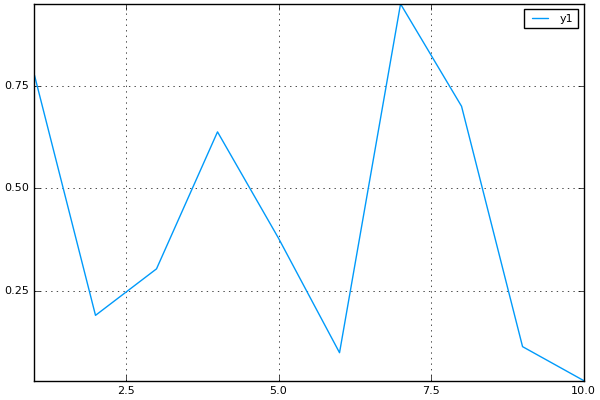

In [10]:
@time plot(data[:,1])

### switching between styles

  0.178930 seconds (154.68 k allocations: 6.637 MB)



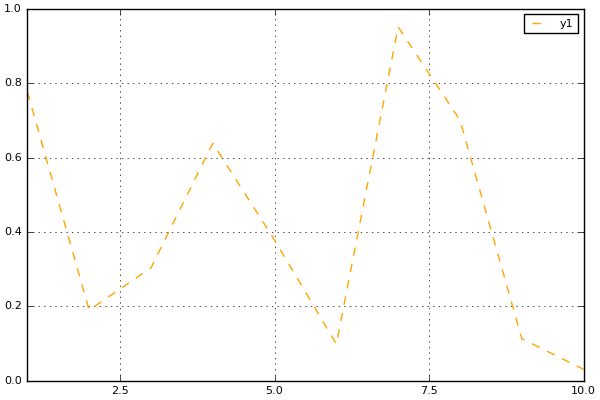

In [11]:
@time plot(data[:,1], color = "orange", linestyle = :dash, ylim=(0,1))

**For more options**: check out the documentation at https://juliaplots.github.io/.

### Interactive Tools

Interact.Slider{Int64}(Signal{Int64}(5, nactions=0),"i",5,1:10,"d",true)

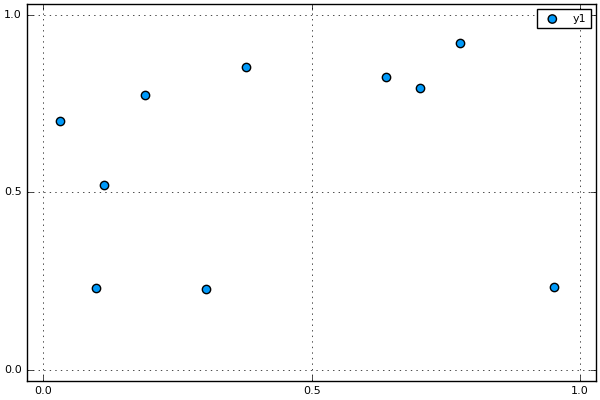

In [12]:
using Interact

@manipulate for i=1:10
    scatter(data[:,1], data[:,i], xlim=(0,1), ylim=(0,1))
end

### switching to a different backend

In [13]:
plotlyjs()

scatter(data[:,1], data[:,5])

[Plots.jl] Initializing backend: plotlyjs


## Geospatial Processing with Julia

- Follows the hands-on example at the end of https://github.com/jwass/maptime-boston-python.
- Introduce the following libraries (work-in-progress):
  - `ArchGDAL.jl` (similar to `rasterio` and `fiona`)
  - `GeoDataFrames.jl` (similar to `geopandas`)

In [14]:
import ArchGDAL

@time ArchGDAL.registerdrivers() do
    ArchGDAL.read("data/Boston_Neighborhoods.shp") do dataset
        println(dataset)
    end
end

GDAL Dataset (Driver: ESRI Shapefile/ESRI Shapefile)
Files: data/Boston_Neighborhoods.shp
       data/Boston_Neighborhoods.shx
       data/Boston_Neighborhoods.dbf
       data/Boston_Neighborhoods.cpg
       data/Boston_Neighborhoods.prj

Number of feature layers: 1
  Layer 0: Boston_Neighborhoods (wkbPolygon), nfeatures = 26

  0.700740 seconds (471.62 k allocations: 19.856 MB)


In [15]:
@time ArchGDAL.registerdrivers() do
    ArchGDAL.read("data/Boston_Neighborhoods.shp") do dataset
        for feature in ArchGDAL.getlayer(dataset, 0)
            println(feature)
        end
    end
end

Feature
  (index 0) geom => MULTIPOLYGON
  (index 0) Acres => 1605.56181523
  (index 1) Name => Roslindale
  (index 2) OBJECTID => 1
  (index 3) SHAPE_area => 6.99382726723e7
  (index 4) SHAPE_len => 53563.9125971

Feature
  (index 0) geom => POLYGON
  (index 0) Acres => 2519.23531679
  (index 1) Name => Jamaica Plain
  (index 2) OBJECTID => 2
  (index 3) SHAPE_area => 1.09737890396e8
  (index 4) SHAPE_len => 56349.9371614

Feature
  (index 0) geom => POLYGON
  (index 0) Acres => 350.85216018
  (index 1) Name => Mission Hill
  (index 2) OBJECTID => 3
  (index 3) SHAPE_area => 1.52831200976e7
  (index 4) SHAPE_len => 17918.7241135

Feature
  (index 0) geom => POLYGON
  (index 0) Acres => 188.61119227
  (index 1) Name => Longwood Medical Area
  (index 2) OBJECTID => 4
  (index 3) SHAPE_area => 8.21590353542e6
  (index 4) SHAPE_len => 11908.7571476

Feature
  (index 0) geom => POLYGON
  (index 0) Acres => 26.53973299
  (index 1) Name => Bay Village
  (index 2) OBJECTID => 5
  (index 3) SH

In [16]:
using GeoDataFrames; const GD = GeoDataFrames

neighborhoods = GD.read("data/Boston_Neighborhoods.shp")
DataFrames.head(neighborhoods)

6×6 DataFrames.DataFrame
│ Row │ geometry0                                                              │
├─────┼────────────────────────────────────────────────────────────────────────┤
│ 1   │ Geometry: MULTIPOLYGON (((-71.1259265672231 42.2720044534673 ... 34))) │
│ 2   │ Geometry: POLYGON ((-71.104991583 42.3260930173557,-71.10487 ... 557)) │
│ 3   │ Geometry: POLYGON ((-71.0904337145803 42.3357612955289,-71.0 ... 289)) │
│ 4   │ Geometry: POLYGON ((-71.098108339852 42.3367217099475,-71.09 ... 475)) │
│ 5   │ Geometry: POLYGON ((-71.0666286565676 42.3487740128554,-71.0 ... 554)) │
│ 6   │ Geometry: POLYGON ((-71.0583778032908 42.3498224214285,-71.0 ... 285)) │

│ Row │ Acres   │ Name                    │ OBJECTID │ SHAPE_area │ SHAPE_len │
├─────┼─────────┼─────────────────────────┼──────────┼────────────┼───────────┤
│ 1   │ 1605.56 │ "Roslindale"            │ 1        │ 6.99383e7  │ 53563.9   │
│ 2   │ 2519.24 │ "Jamaica Plain"         │ 2        │ 1.09738e8  │ 56349.9   │
│ 3   │ 350.852 │ "Mission Hill"          │ 3        │ 1.52831e7  │ 17918.7   │
│ 4   │ 188.611 │ "Longwood Medical Area" │ 4        │ 8.2159e6   │ 11908.8   │
│ 5   │ 26.5397 │ "Bay Village"           │ 5        │ 1.15607e6  │ 4650.64   │
│ 6   │ 15.6398 │ "Leather District"      │ 6        │ 6.81272e5  │ 3237.14   │

In [17]:
rodents = GD.read("data/rodents.geojson")
DataFrames.head(rodents)

6×3 DataFrames.DataFrame
│ Row │ geometry0                          │ id    │ OPEN_DT                  │
├─────┼────────────────────────────────────┼───────┼──────────────────────────┤
│ 1   │ Geometry: POINT (-71.0721 42.3224) │ "48"  │ "11/09/2011 02:54:02 PM" │
│ 2   │ Geometry: POINT (-71.0617 42.3477) │ "67"  │ "03/05/2014 08:46:53 AM" │
│ 3   │ Geometry: POINT (-71.0464 42.3357) │ "86"  │ "10/19/2011 03:21:20 PM" │
│ 4   │ Geometry: POINT (-71.0168 42.3834) │ "95"  │ "05/31/2012 01:37:49 PM" │
│ 5   │ Geometry: POINT (-71.1059 42.3099) │ "96"  │ "11/20/2015 09:37:19 AM" │
│ 6   │ Geometry: POINT (-71.0765 42.342)  │ "186" │ "09/20/2012 09:11:27 AM" │

In [18]:
function numrodents(neighborhood)
    sum([ArchGDAL.contains(neighborhood.ptr, r.ptr) for r in rodents[:geometry0]])
end

@time numrodents(neighborhoods[1,:geometry0])

  1.136001 seconds (173.20 k allocations: 4.905 MB)


156

In [19]:
@time neighborhoods[:numrodents] = Int[numrodents(n) for n in neighborhoods[:geometry0]]
DataFrames.head(neighborhoods)

 40.637459 seconds (2.76 M allocations: 55.816 MB, 0.04% gc time)


6×7 DataFrames.DataFrame
│ Row │ geometry0                                                              │
├─────┼────────────────────────────────────────────────────────────────────────┤
│ 1   │ Geometry: MULTIPOLYGON (((-71.1259265672231 42.2720044534673 ... 34))) │
│ 2   │ Geometry: POLYGON ((-71.104991583 42.3260930173557,-71.10487 ... 557)) │
│ 3   │ Geometry: POLYGON ((-71.0904337145803 42.3357612955289,-71.0 ... 289)) │
│ 4   │ Geometry: POLYGON ((-71.098108339852 42.3367217099475,-71.09 ... 475)) │
│ 5   │ Geometry: POLYGON ((-71.0666286565676 42.3487740128554,-71.0 ... 554)) │
│ 6   │ Geometry: POLYGON ((-71.0583778032908 42.3498224214285,-71.0 ... 285)) │

│ Row │ Acres   │ Name                    │ OBJECTID │ SHAPE_area │ SHAPE_len │
├─────┼─────────┼─────────────────────────┼──────────┼────────────┼───────────┤
│ 1   │ 1605.56 │ "Roslindale"            │ 1        │ 6.99383e7  │ 53563.9   │
│ 2   │ 2519.24 │ "Jamaica Plain"         │ 2        │ 1.09738e8  │ 56349.9   │
│ 3   │ 350.852 │ "Mission Hill"          │ 3        │ 1.52831e7  │ 17918.7   │
│ 4   │ 188.611 │ "Longwood Medical Area" │ 4        │ 8.2159e6   │ 11908.8   │
│ 5   │ 26.5397 │ "Bay Village"           │ 5        │ 1.15607e6  │ 4650.64   │
│ 6   │ 15.6398 │ "Leather District"      │ 6        │ 6.81272e5  │ 3237.14   │

│ Row │ numrodents │
├─────┼────────────┤
│ 1   │ 156        │
│ 2   │ 491        │
│ 3   │ 157        │
│ 4   │ 4          │
│ 5   │ 81         │
│ 6   │ 10         │

### GeoVisualizations

In [20]:
@time GeoDataFrames.plot(neighborhoods,
    label=:Name,
    plt = Plots.plot(bg = :white))

  0.991141 seconds (2.00 M allocations: 95.164 MB, 3.36% gc time)


In [21]:
@time GeoDataFrames.plot(neighborhoods,
    label = :Name,
    plt = Plots.plot(bg = :white),
    fillvalue = :numrodents,
    legend = false)

  0.313073 seconds (1.11 M allocations: 55.179 MB, 5.76% gc time)


In [22]:
plotlyjs()
@time plt = GeoDataFrames.plot(neighborhoods,
    label = :Name,
    plt = Plots.plot(bg = :white),
    fillvalue = :numrodents,
    legend = false,
    colorgrad = Plots.cgrad(:blues))

  0.177504 seconds (1.04 M allocations: 52.112 MB, 6.36% gc time)


## Opportunities and Challenges
![](http://cacm.acm.org/system/assets/0001/3678/rp-overview.jpg)

http://cacm.acm.org/blogs/blog-cacm/169199-data-science-workflow-overview-and-challenges/fulltext

## Opportunities and Challenges

- Wes McKinney, [Data Tools and the Data Scientist Shortage](http://www.slideshare.net/wesm/data-tools-and-the-data-scientist-shortage)

![](fig/hierarchyneeds.png)

## Opportunities and Challenges

- Wes McKinney, [Data Tools and the Data Scientist Shortage](http://www.slideshare.net/wesm/data-tools-and-the-data-scientist-shortage)

![](fig/datatools2.png)

## Opportunities and Challenges

- Wes McKinney, [Data Tools and the Data Scientist Shortage](http://www.slideshare.net/wesm/data-tools-and-the-data-scientist-shortage)

![](fig/datatools.png)

## Opportunities and Challenges

> Learn tools, and use tools, but don't accept tools. Always distrust them; always be alert for alternative ways of thinking. This is what I mean by avoiding the conviction that you "know what you're doing". -- **Bret Victor**, [*The Future of Programming*](http://worrydream.com/dbx/)

- Encourage common/shared resources across multiple languages (Matlab, R, Python, Julia, etc):

    - SQLite & Spatialite
    - GDAL2.0+
    - JupyterLab
    - ...

## Opportunities and Challenges

- Roger Bivand, [The R Development Process](https://r2014-mtp.sciencesconf.org/file/92674)
    - The very specific and uncodified skill set in R development and maintenance, covering not only a mix of programming languages, but also attitudes to checking the consequences of commits
    - Recruitment is problematic; doing R, CRAN or R-Forge maintenance does not bring tenure, and very often insufficient understanding for the dilemmas faced by maintainers is shown
    - R will benefit from the maturing of alternatives such as Julia [and Python], and movements between projects among developers should be seen as a useful sharing of experience